<h1>Downloading the MediaPipe Packages</h1>

In [ ]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 39.2 MB/s eta 0:00:00


<h1> From MediaPipe, Import the Functions

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

<h1> Get Model

In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [ ]:
model_path = 'gesture_recognizer.task'

<h1> Initializing parameters

In [ ]:
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = GestureRecognizerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=2)

recognizer = GestureRecognizer.create_from_options(options)

<h1> Import Test Photos and Use OpenCV to Picture them

In [ ]:
import urllib

IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}'
  urllib.request.urlretrieve(url, name)

thumbs_down.jpg


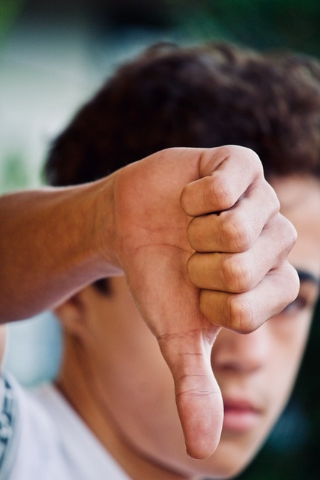

victory.jpg


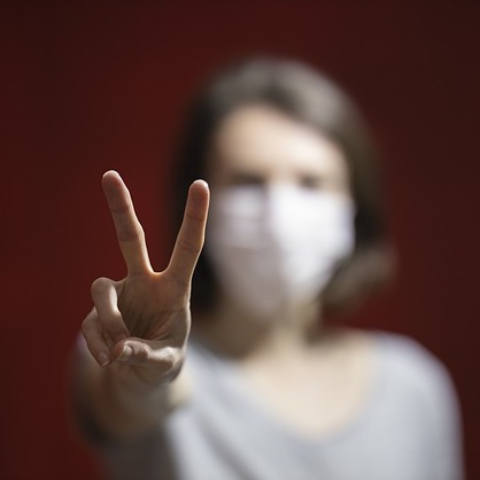

thumbs_up.jpg


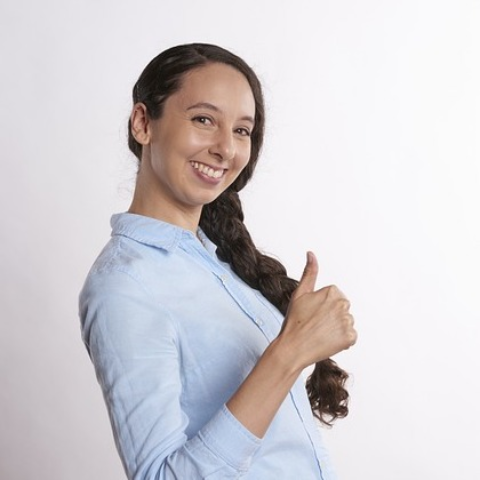

pointing_up.jpg


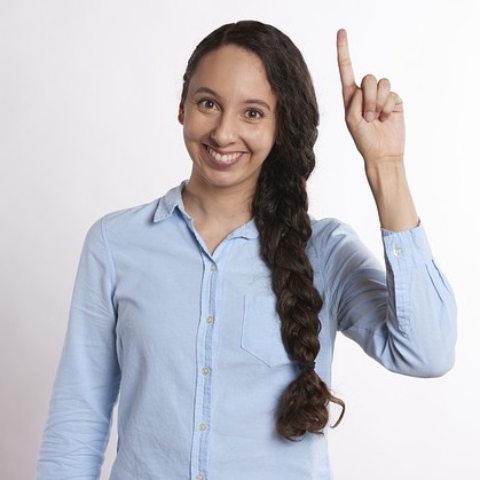

In [ ]:
import cv2

from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

<h1> Running Model
<h5>When using this model with lets say a video, we would just have to split the video up by frames and take each frame as an image to pass into the model. We then can get the results from the model for each frame essentially having the timestamps of each gesture

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
images = []
results = []

for image_file in IMAGE_FILENAMES:
  print(image_file)
  image = mp.Image.create_from_file(image_file)
  print(type(image))
  recognition_result = recognizer.recognize(image)

  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))

# display_batch_of_images_with_gestures_and_hand_landmarks(images, results)
for r in results:
  for i in r:
    print(i)

thumbs_down.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
victory.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
thumbs_up.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
pointing_up.jpg
<class 'mediapipe.python._framework_bindings.image.Image'>
Category(index=-1, score=0.773087739944458, display_name='', category_name='Thumb_Down')
[[NormalizedLandmark(x=0.3775797188282013, y=0.4484468102455139, z=-7.658888421246957e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4565984308719635, y=0.5906875133514404, z=-0.12274357676506042, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5610435009002686, y=0.7097854018211365, z=-0.21682056784629822, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6087026596069336, y=0.8151220083236694, z=-0.2963387668132782, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6378509998321533, y=0.9088300466537476, z=-0.35788747668266296, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8

['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']


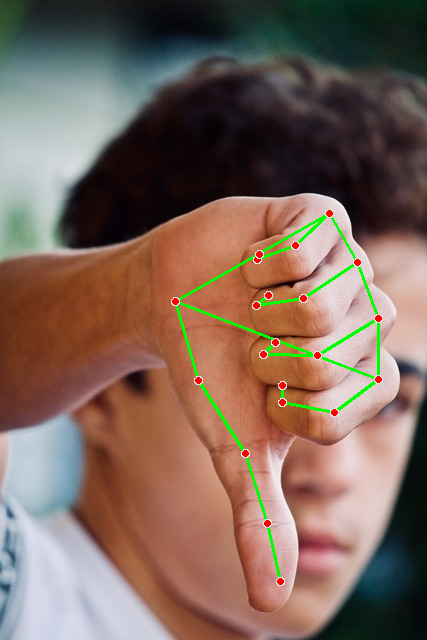

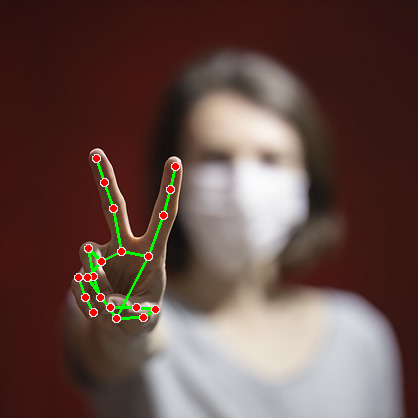

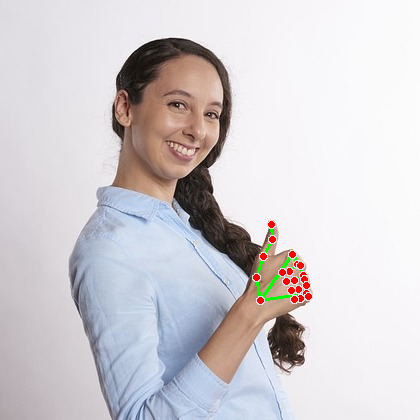

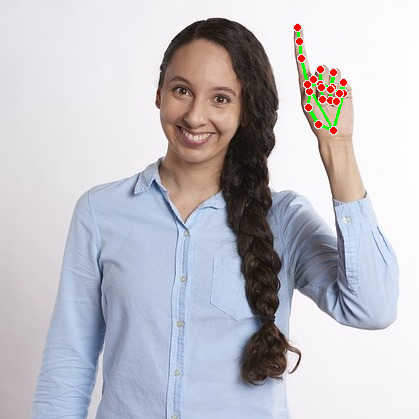

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Replace 'IMAGE_FILENAMES' with your list of image file paths
print(IMAGE_FILENAMES)
images_rgb = []  # Store RGB images
images_bgr = []  # Store BGR images for display

# Read and prepare images
for image_path in IMAGE_FILENAMES:
    image_bgr = cv2.imread(image_path)  # Load in BGR format
    images_bgr.append(image_bgr)  # Keep original BGR for later
    images_rgb.append(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))  # Convert to RGB

# Process images with Mediapipe Hands
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
    for i, image_rgb in enumerate(images_rgb):
        # Process the image
        results = hands.process(image_rgb)

        # Check if any hands are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw the landmarks on the corresponding BGR image
                mp_drawing.draw_landmarks(
                    images_bgr[i],  # Original BGR image
                    hand_landmarks,  # Detected landmarks
                    mp_hands.HAND_CONNECTIONS,  # Hand connections for visual structure
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),  # Landmarks style
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)  # Connections style
                )

# Display all images with landmarks in Colab
for image_bgr in images_bgr:
    cv2_imshow(image_bgr)


In [ ]:
!mkdir vid_images

In [ ]:
import mediapipe as mp
from google.colab.patches import cv2_imshow
def arrayToImg(arr):
  return cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)

In [ ]:
import cv2
print(cv2.__version__)
raw_video = cv2.VideoCapture("video_test.mp4")
# print(len(raw_video.read()[1]))
success, images = raw_video.read()
fps = raw_video.get(cv2.CAP_PROP_FPS)
print(fps)

4.10.0
30.017605633802816


In [ ]:
skip = 0
if(fps >= 30):
  skip = int(fps/30)
  if(skip == 0):
    skip = 1

In [ ]:
rgb_imgs = []
bgr_imgs = []
i = 0
success, frame = raw_video.read()
while success:
    if(i % skip == 0):

      rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      rgb_imgs.append(rgb_frame)

      display_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2BGR)
      bgr_imgs.append(display_frame)

    # Show the frame
    # cv2_imshow(display_frame)

    # Read the next frame
    i += skip
    success, frame = raw_video.read()

# i = 0
# thirty_fps = []
# while(i < len(images)):
#   thirty_fps.append(images[i])
#   i += skip

In [ ]:
print(len(rgb_imgs))
print(len(bgr_imgs))

340
340


In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
  example_result = hands.process(rgb_imgs[0])
  if example_result.multi_hand_landmarks:
      for hand_landmarks in example_result.multi_hand_landmarks:
          # Draw the landmarks on the corresponding BGR image
          mp_drawing.draw_landmarks(
              bgr_imgs[0],  # Original BGR image
              hand_landmarks,  # Detected landmarks
              mp_hands.HAND_CONNECTIONS,  # Hand connections for visual structure
              mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),  # Landmarks style
              mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)  # Connections style
          )

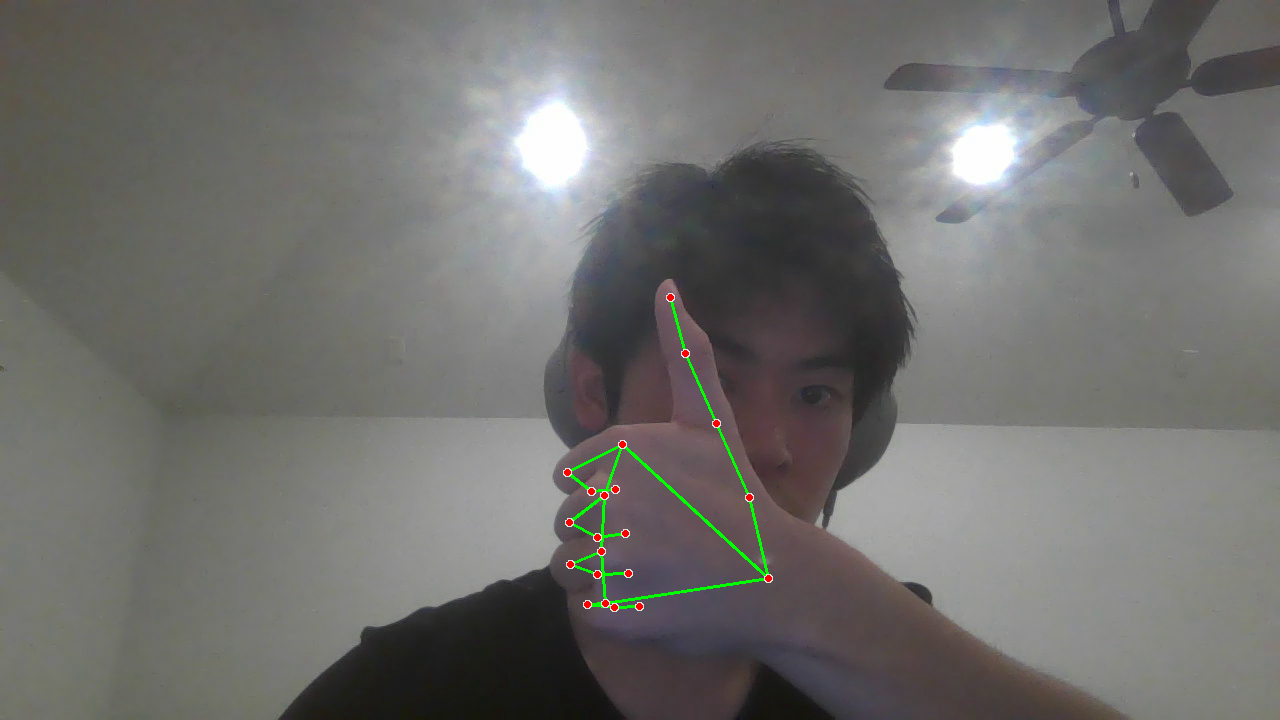

In [ ]:
cv2_imshow(bgr_imgs[0])

In [ ]:
GestureRecognizerResult_Frames = []
Gestures_Frames = []

In [ ]:
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
  for img in rgb_imgs:
    mp_img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    result = recognizer.recognize(mp_img)
    GestureRecognizerResult_Frames.append(result)
    frame = []
    for i in result.gestures:
      frame.append(gesture_dict[i[0].category_name])
    Gestures_Frames.append(frame)
print(len(GestureRecognizerResult_Frames))

340


In [ ]:
gesture_dict ={"Unknown": 0,
"Closed_Fist": 1,
"Open_Palm":2,
"Pointing_Up":3,
"Thumb_Down":4,
"Thumb_Up":5,
"Victory":6,
"ILoveYou":7,
"None":-1
}

<H5> Note: The GestureRecognizerResult object has the following data: gestures, handedness, hand_landmarks, hand_world_landmarks

In [ ]:
gesture_dict[GestureRecognizerResult_Frames[0].gestures[0][0].category_name]

[[Category(index=-1, score=0.6649966239929199, display_name='', category_name='Thumb_Up')]]

In [ ]:
GestureRecognizerResult_Frames[0]

GestureRecognizerResult(gestures=[[Category(index=-1, score=0.6649966239929199, display_name='', category_name='Thumb_Up')]], handedness=[[Category(index=1, score=0.9853784441947937, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.5982216000556946, y=0.809069037437439, z=-4.653445273561374e-08, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.585529625415802, y=0.6949636340141296, z=0.009960968978703022, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5592890977859497, y=0.5865711569786072, z=0.007870486937463284, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5367307662963867, y=0.4914219081401825, z=0.003895014990121126, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5273066163063049, y=0.41364794969558716, z=-0.0024137147702276707, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4867926239967346, y=0.6146338582038879, z=0.00929308868944645, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.44303783774375916, y=

In [ ]:
# from heapq import heappop, heappush, heapify

# heap = []
# heapify(heap)

# heappush(heap, -1 * 10)
# heappush(heap, -1 * 30)
# heappush(heap, -1 * 20)
# heappush(heap, -1 * 400)

# print("Head value of heap : " + str(-1 * heap[0]))

# print("The heap elements : ")
# for i in heap:
#     print((-1*i), end=" ")
# print("\n")

# element = heappop(heap)

[0]

In [ ]:
image = mp.Image.create_from_file("two_thumbs_up.jpg")
recognition_result = recognizer.recognize(image)

In [ ]:
recognition_result.gestures

[[Category(index=-1, score=0.7274479269981384, display_name='', category_name='Thumb_Up')],
 [Category(index=-1, score=0.6356533765792847, display_name='', category_name='Thumb_Up')]]

In [ ]:
for i in recognition_result.gestures:
  print(gesture_dict[i[0].category_name])

5
5
